## What Is a Time-Series?
A time-series is a series of data points indexed, listed, or graphed in time order. Most commonly, a time-series is a sequence taken at successive and equally spaced points in time. Thus, it is a sequence of discrete-time data.

It is a subfield of machine learning and statistics that analyzes temporal data.


## What Is Time-Series Forecasting? (Predictive Analytics)
Time-series forecasting is the use of a model to predict future values based on previously observed values. 

Time-series forecasting is performed in nearly every organization that deals with quantifiable data. Some examples include:
    
    Retail stores forecasting sales
    
    Energy companies forecasting reserves, production, demand, and prices
    
    Educational institutions forecasting enrollments
    
    The government forecasting tax receipts and spending
    
    International financial organizations such as the World Bank and International Monetary Fund forecasting inflation     and economic activities
    
    Passenger transport companies use time-series to forecast future travel

## What Is Time-Series Analysis? (Descriptive Analytics)
Time-series analysis comprises methods for analyzing time-series data in order to extract meaningful statistics and other characteristics of the data. Some examples include:
    
    Marketing campaign’s effects on retail stores’ sales
    
    Energy companies use this analysis to see the daily and seasonal effects on power demand
    
    Educational institutions use this for comparing students’ performance over a period of time
    
    The government uses it to check the causal effects of its policies or calamities. (How does demonetization affects inflation?)
    
    Travel companies use this to see how the demand fluctuates in a day, weekend, or holiday.
    
    Almost all websites use A/B testing to check the performance of the website
    
## Steps in a Forecasting Task
1. Visualize the time series- check for trend, seasonality, or random patterns
2. Make the time series stationary- remove trend and seasonality
3. Plot the ACF and PACF charts and find the optimal parameters (p,d,q)
4. Build the ARIMA model and use it to make predictions
5. Evaluate the model using the MSE and RMSE values


### Problem Statement:
    The stock market is one of the most highly sought fields these days. Predicting how the stock price is going to behave will always keep us one step ahead.

### Objective:     
    Visualize the data with the help of the following list of plots, and generate a few insights from the data.
        Time Plot
        
        Stacked Line Charts
        
        Box Plot
        
        Lag Plot
        
        Auto-Correlation Plot

### Dataset:        
The Dataset is the average monthly stock price of a beer production company in Australia from 1991 to 2005.   

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)

import seaborn as sn
sn.set(style='whitegrid', color_codes=True)

ts = pd.read_csv('/Users/michaeldionne/Library/CloudStorage/Dropbox/AI_ML Bootcamp/Caltech-AI-Machine-Learning-Bootcamp/Course5_Machine Learning/Datasets_sep/Caltech LVC Datasets/Lesson 6/Dataset/stock_price.csv')
ts["ds"] = pd.to_datetime(ts["ds"])
print(ts.shape)
ts.head()


(204, 2)


,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


### Time Plot
    Is a chart for time versus variable that need to be predicted
    
    Visualizes the pattern (trend and seasonality) in the data
    
    Aggregates data to weeks, months, quarters, and years, and visualizes better detection patterns
    
    Enlarges to specific locations inside the data to get a better view

Text(0.5, 1.0, 'Stock Price')

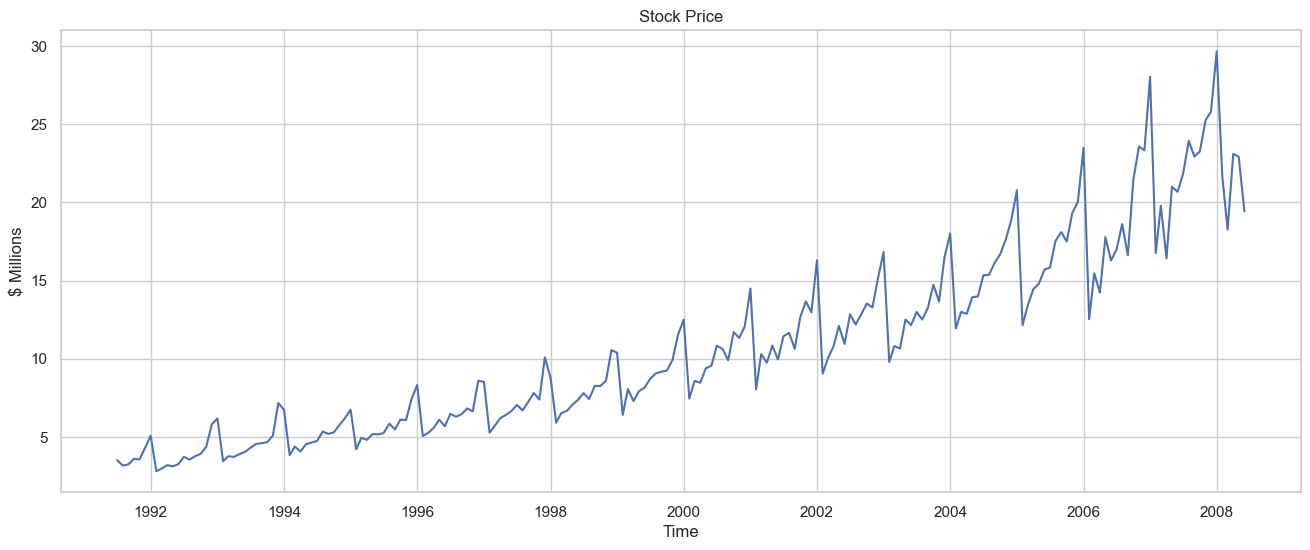

In [4]:
#setting the size of the plot
plt.figure(figsize=(16,6))
plt.plot(ts["ds"], ts["y"])
plt.xlabel("Time")
plt.ylabel("$ Millions")
plt.title("Stock Price")


### Insights from the Time Plot
    There is a clear and increasing trend

    There is also a strong seasonal pattern that increases in size as the level of the series increases

Any forecasts of this series would need to capture the seasonal pattern and the fact that the trend is changing

### Stacked Line Charts
    These are another way of viewing the time-series data

    Here, we have kept the month on the x-axis, revenue on the y-axis, and year in color

In [5]:
# Stacked Line Chart example
ts["year"] = ts["ds"].dt.year
ts["month"] = ts["ds"].dt.strftime('%b')
ts.head()


,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


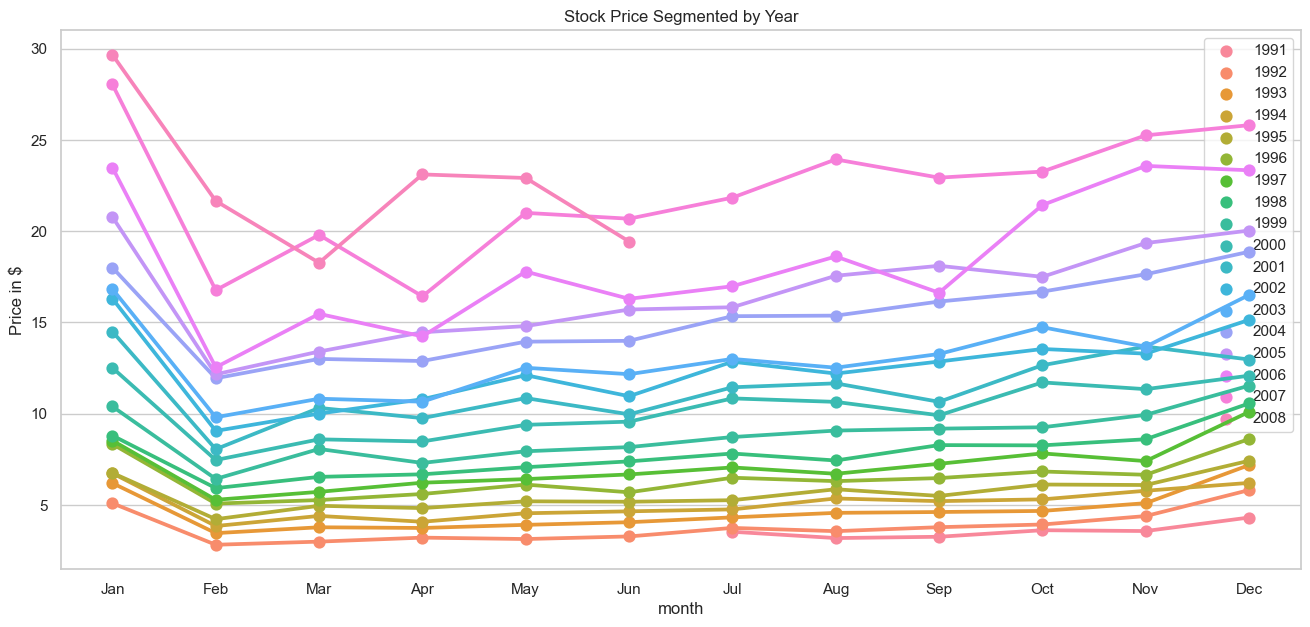

In [6]:
#Setting the size of the plot
plt.figure(figsize =(16,7))
sn.pointplot(x="month", y="y", hue="year", data=ts, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year")
plt.legend(loc='upper right')


### Insights from the Stacked Line Charts
    There is a large jump in price in January each year.

    The graph also shows the drop in the price in March 2008 (most of the other years show an increase between February and March.)

### Box Plot
Box and whisker plot is useful when large numbers of observations are involved and when two or more datasets are being compared.

Boxplot is a standardized method of depicting data distributions based on a five-number summary ("minimum", "first quartile (Q1)", "median", "third quartile (Q3)", and "maximum").

First quartile (Q1/25th Percentile):
The middle number between the smallest number and the median of the dataset

Median (Q2/50th Percentile):
The middle value of the dataset

Third quartile (Q3/75th Percentile):
The middle value between the median and the highest value of the dataset

Interquartile range (IQR):
25th to the 75th percentile

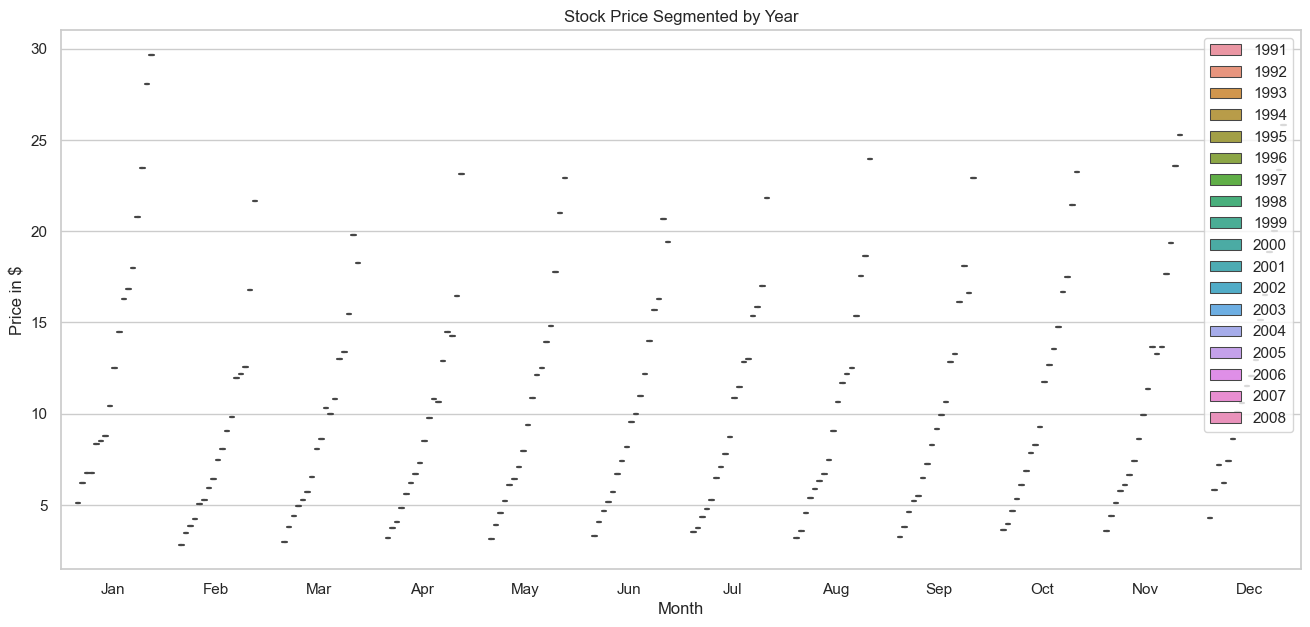

In [7]:
# Setting the size of the plot
plt.figure(figsize=(16, 7))

# Creating the boxplot
sn.boxplot(x="month", y="y", hue="year", data=ts, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Setting the labels and title
plt.xlabel("Month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year")

# Adding the legend
plt.legend(loc='upper right')

# Displaying the plot
plt.show()



#### Insights from Box Plot
There are fluctuations in stock prices of different months.

The graph also shows outliers in August and November which are represented by small dots.

#### Lag Plot
A lag plot checks whether a dataset or time-series is random or not.

Random data should not exhibit any identifiable structure in the lag plot.

Nonrandom structure in the lag plot indicates the lack of randomness in the underlying data.

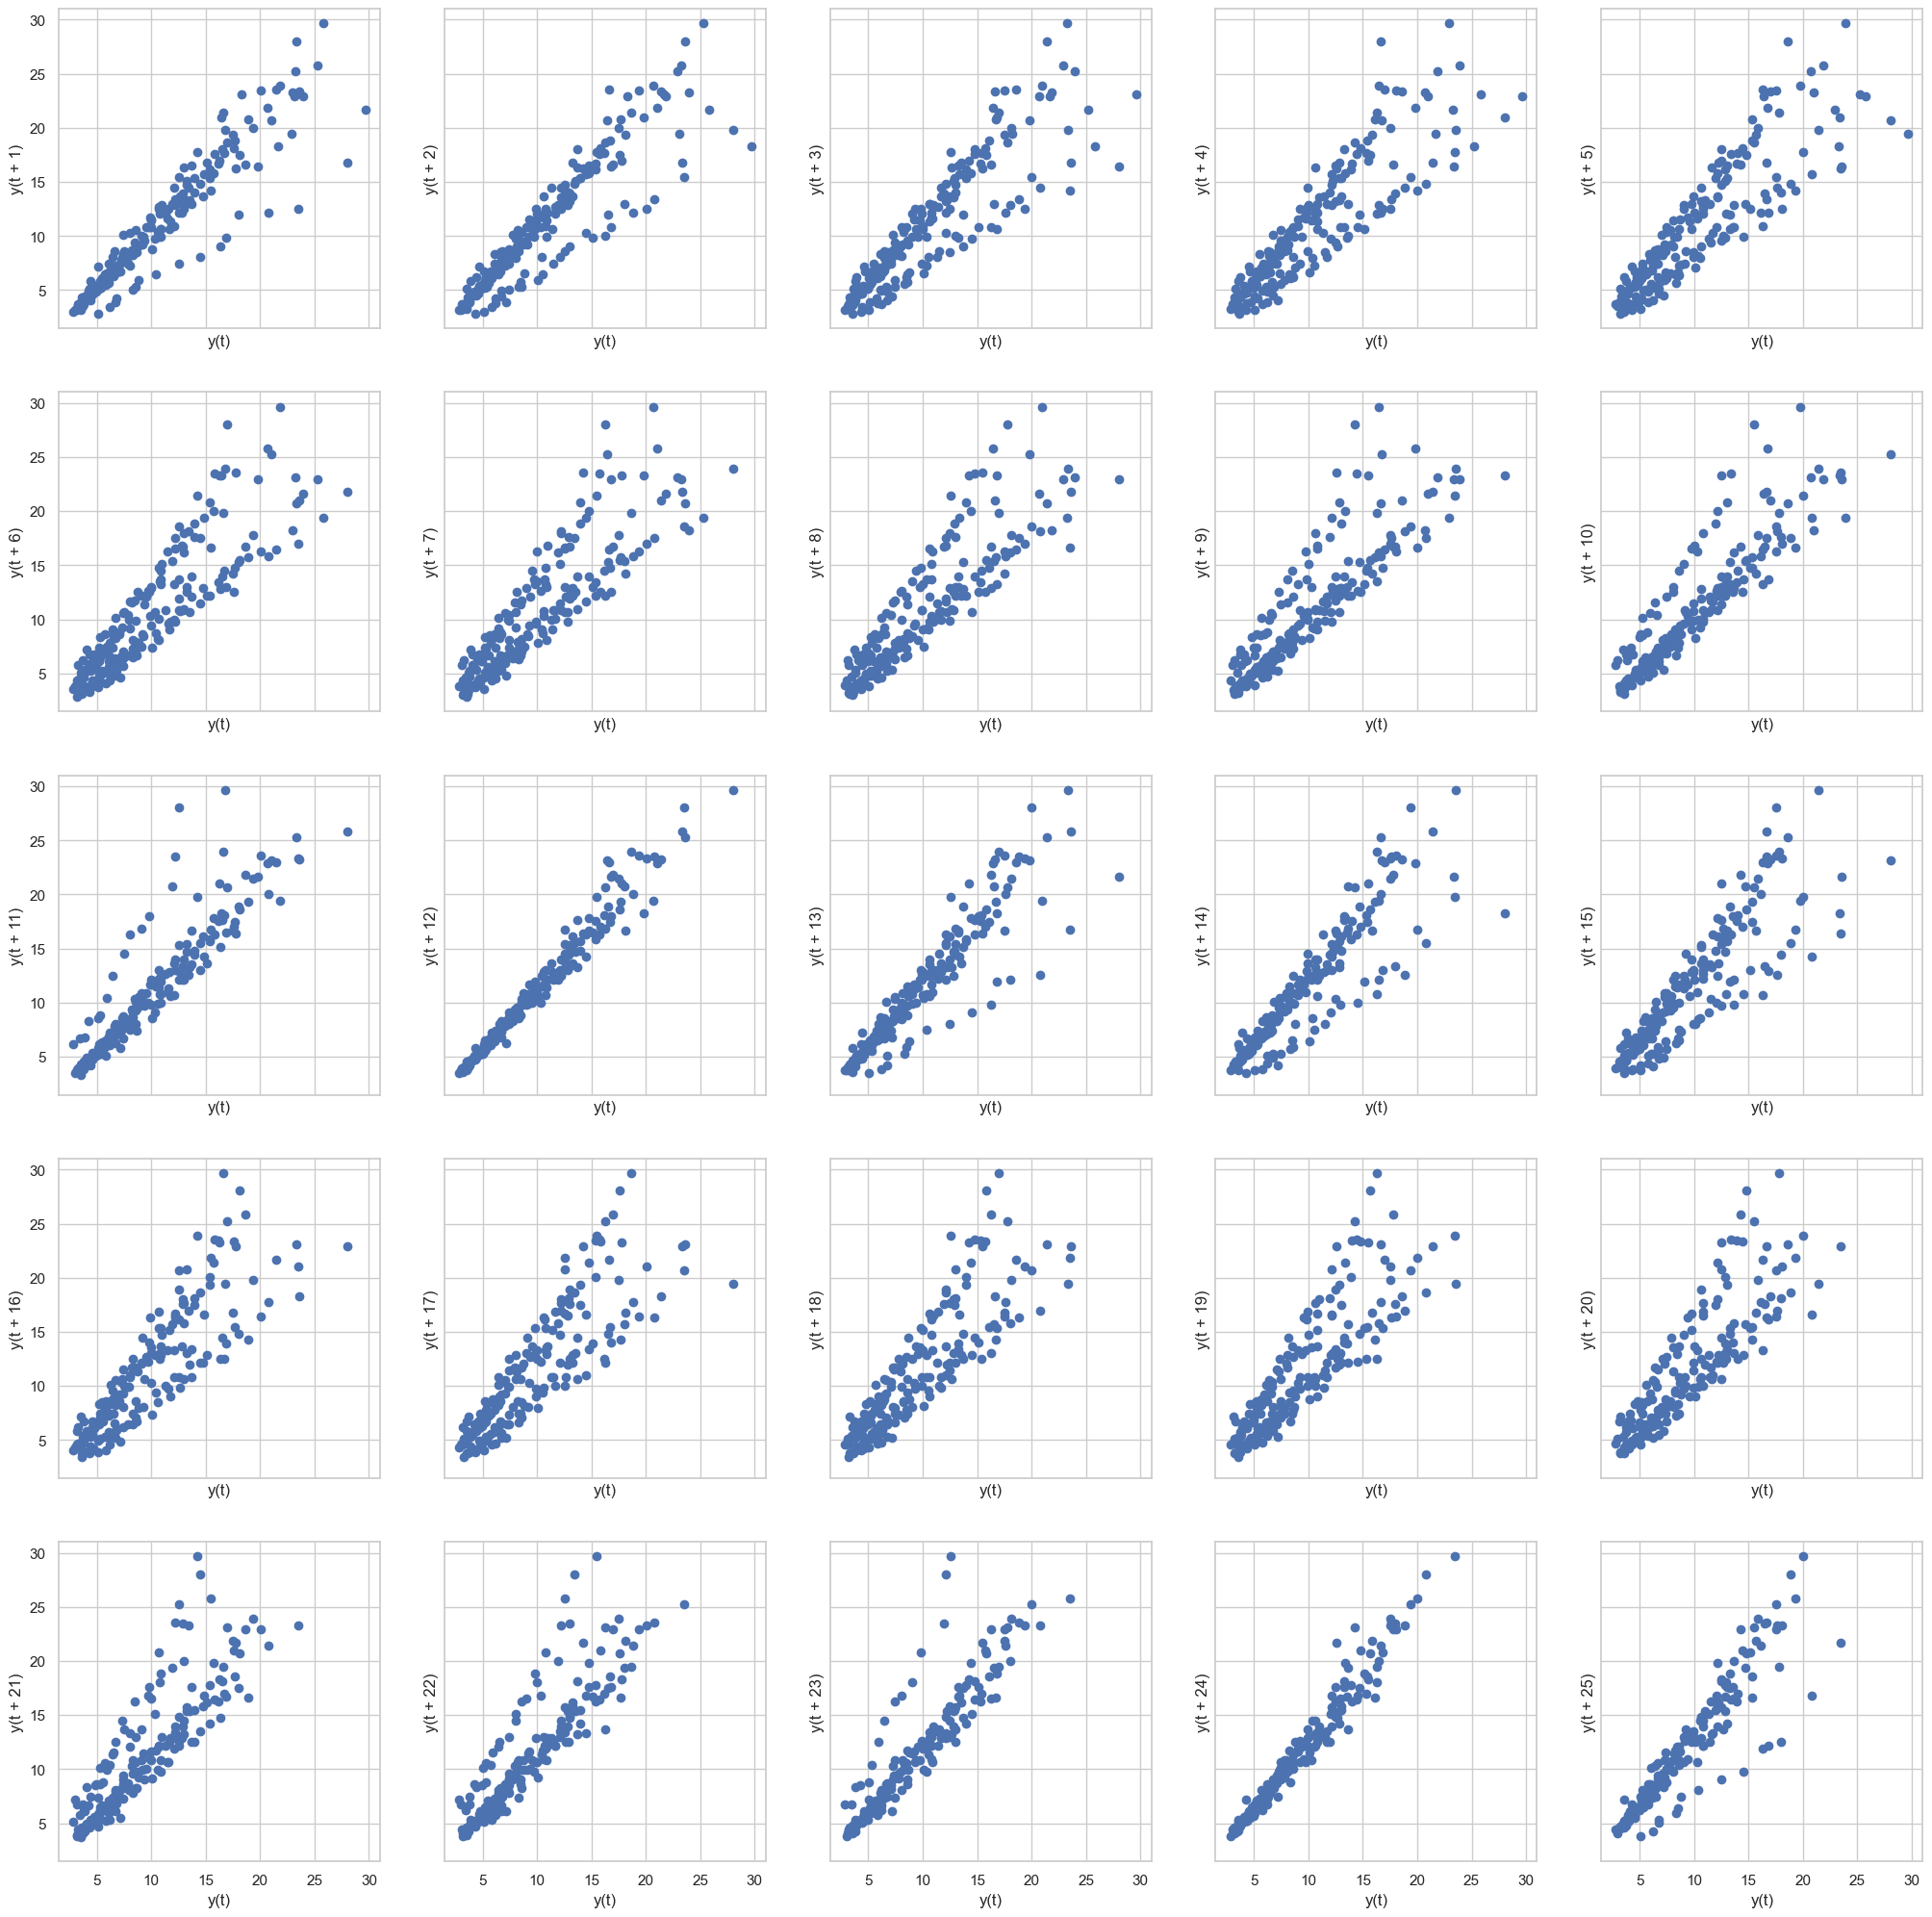

In [8]:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

plot_lags = 25
rows = int(plot_lags / 5)
cols = int(plot_lags / 5)

fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)

count = 1
for i in range(rows):
    for j in range(cols):
        lag_plot(ts["y"], lag=count, ax=axes[i, j])
        count += 1

plt.show()


#### Insights from Lag Plot
The plot displays patterns, indicating that the data is not random.


### Autocorrelation Plot
It is designed to show whether the elements of a time-series are positively correlated, negatively correlated, or independent of each other.

Correlation simply means association, and measures how closely two variables are related.

A positive correlation is a two-variable association in which both variables move in the same direction. As a result,when one variable increases the other increases, or when one variable decreases the other decreases.

A negative correlation is a link between two variables in which an increase in one variable causes the other to decrease.

When there is no correlation between two variables, it is called a zero correlation.

It is similar to lag plots.

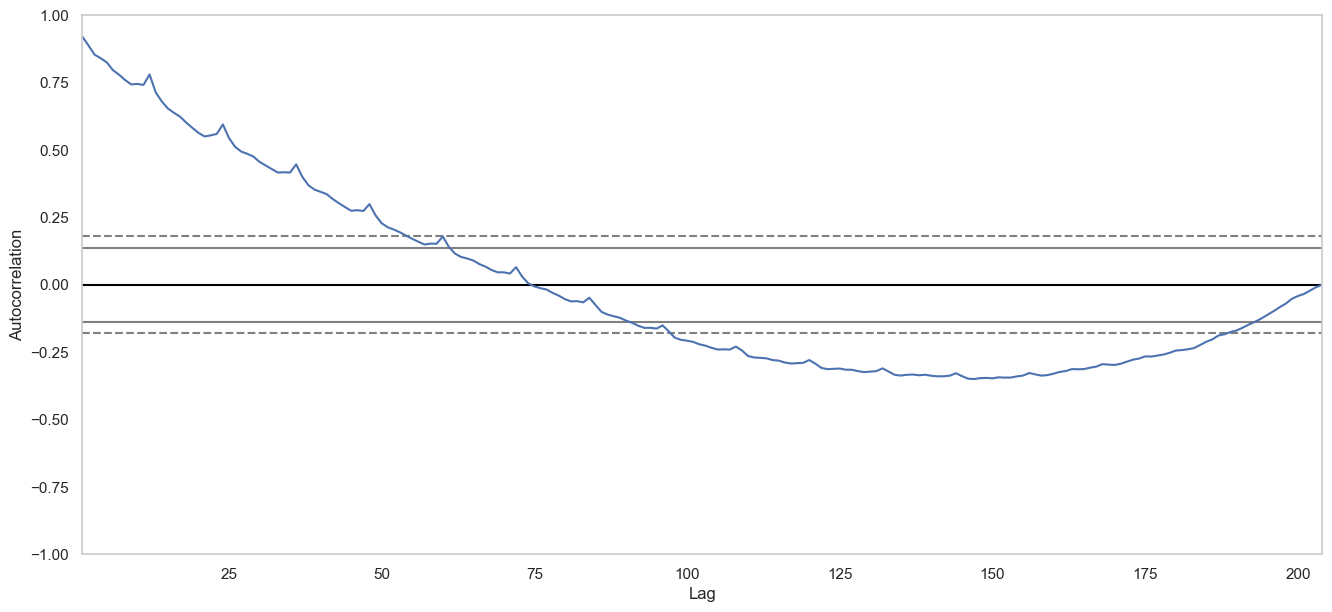

In [9]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))
autocorrelation_plot(ts["y"])
plt.show()


#### Insights from Autocorrelation Plot
The graph depicts a downward trending negative trend from left to right, indicating negative autocorrelation.

## Decomposing Time-Series Data
Decomposing a time series entails considering it as a collection of level, trend, seasonality, and noise components.

The two components of time series are: Systematic Components refer to the fact that the time series has a system, orrecurrence that can be described and, Non-Systematic Components are those that cannot be modeled.

    White Noise
        A time-series is white noise if the variables are independent and identically distributed with a mean of zero.
        
        All variables have the same variance, and each value has a zero correlation with all other values in the series.
        
        If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise.

    Time series is not white noise if any of the following conditions are true
        
        If the series has a zero mean
        
        If the variance changes over time
        
        If values correlate with lag values

    #### How to Detect White Noise?
    Check the mean and variance over a period of time by taking different intervals.
    
    Create a correlogram and check for any autocorrelation with lag variables.

## Random Walk
A random walk is another time-series model where the current observation is equal to the previous observation with a random step up or down.

Is your time-series a random walk?
    The time-series shows a strong temporal dependence that decays linearly or in a similar pattern.
    
    The time-series is not stationary, and making it stationary shows no obvious learnable structure in the data.
    
    Draw a correlogram of autocorrelations. Check if there is any correlation with the lag variable.
    
    Make the data stationary (discussed later), and check if there is any correlation with the lag variable. If point one has and point two doesn't, then your data is a random walk.
    
    The persistence model provides the best source of reliable predictions. If your baseline models are performing well compared to all the models you build, you are dealing with a random walk.

### Important Terms Related to Time-Series Data

#### Trend:
A trend exists when there is a long-term increase or decrease in the data and does not have to be linear. Sometimes, a trend is referred to as changing direction, when it goes from an increasing trend to a decreasing one. There is a trend in the anti-diabetic drug sales data.

#### Seasonality:
A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known frequency.

#### Residuals:
When you remove the trend, seasonality, and other observable patterns from the data, white noise is left, and this is

In [10]:
#decomposing to see the white noise

decompose = ts[["ds", "y"]]
decompose = decompose.set_index("ds")
decompose = decompose[["y"]]
decompose.head()


,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


### Importing Decomposition model and plotting graph on Trend, Seasonality, and Residuals

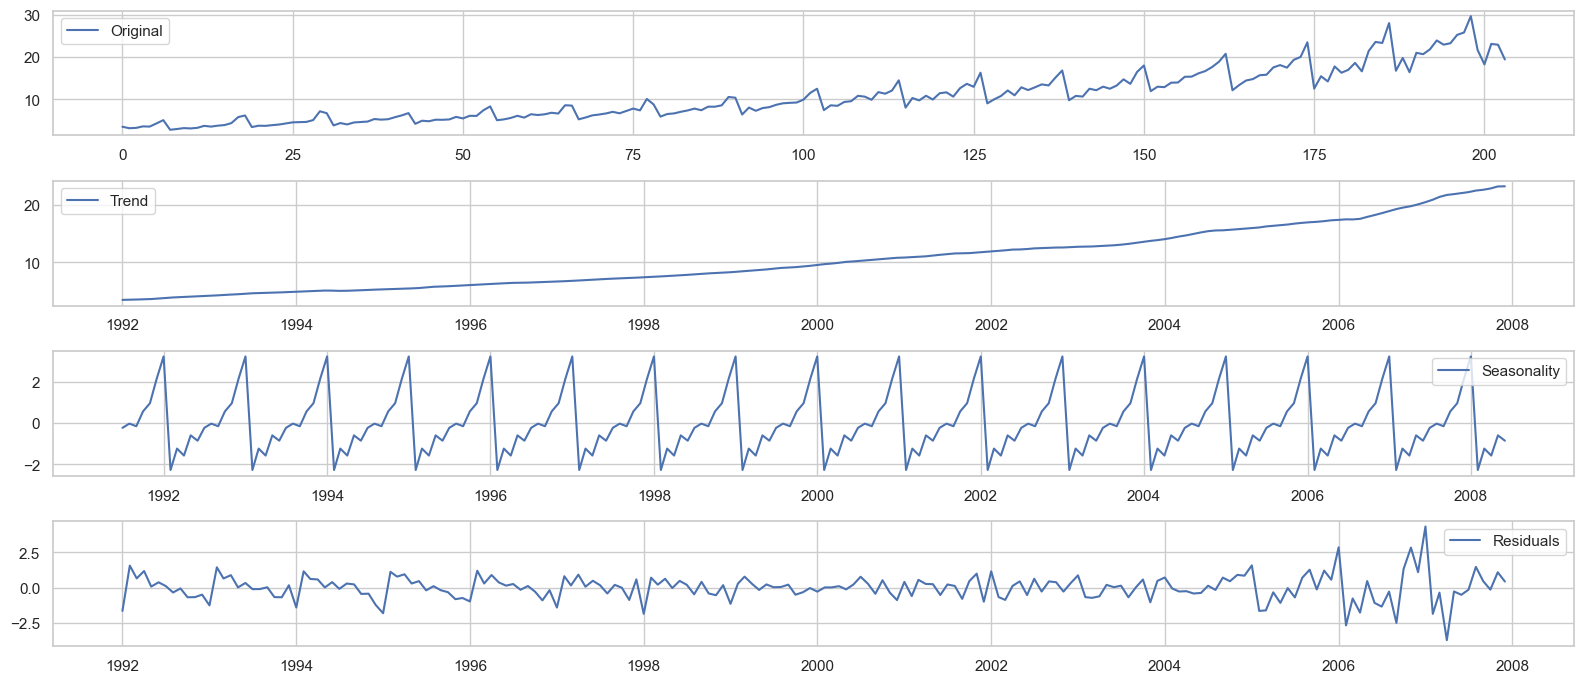

In [12]:
#Importing Decompose Model and plotting graph to see Trend, Seasonality, and Residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose (decompose)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(ts['y'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


#### Insights from Decomposition model
The graph depicts a raise in trend, seasonality, and residuals over the period from 1992 to 2008.

### Problem Statement:
The stock market is one of the most highly sought fields nowadays. Predicting how the stock price is going to behave will always keep us one step ahead.

### Objective:
Check for the stationarity of your data using the Rolling Statistics and Dickey-Fuller test. If stationarity is present, remove it using differencing in Python.

Import Libraries and Load the dataset


In [16]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

ts = pd.read_csv("/Users/michaeldionne/Library/CloudStorage/Dropbox/AI_ML Bootcamp/Caltech-AI-Machine-Learning-Bootcamp/Course5_Machine Learning/Datasets_sep/Caltech LVC Datasets/Lesson 6/Dataset/stock_price.csv")
ts["ds"] = pd.to_datetime(ts["ds"])
print(ts.shape)

ts.head()



(204, 2)


,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [17]:
import datetime
import math 
from sklearn.metrics import mean_squared_error

In [20]:
tss = pd.read_csv("/Users/michaeldionne/Library/CloudStorage/Dropbox/AI_ML Bootcamp/Caltech-AI-Machine-Learning-Bootcamp/Course5_Machine Learning/Datasets_sep/Caltech LVC Datasets/Lesson 6/Dataset/stock_price.csv")
tss["ds"] = pd.to_datetime(tss["ds"])
tss.index = tss["ds"]
tss = tss[["y"]]
print(tss.shape)
print(tss.head())

x_train = tss[tss.index < datetime.datetime(2005,1,1,0,0,0)]
x_test = tss[tss.index >= datetime.datetime(2005,1,1,0,0,0)]
print(x_train.shape, x_test.shape)


(204, 1)
                   y
ds                  
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869
(162, 1) (42, 1)
